In [1]:
pip install arabic-reshaper

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash


import arabic_reshaper
from bidi.algorithm import get_display


In [4]:
df = pd.read_csv("RiyadhVillasAqar.csv")
df

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4.0,5+,20.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3.0,5+,20.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2.0,5+,15.0,1.0,31.0,1.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3.0,5+,15.0,1.0,3.0,0.0,1.0,...,0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2.0,4,25.0,1.0,0.0,1.0,1.0,...,3.0,1.0,1.0,1.0,0.0,0.0,قرطبة,شرق الرياض,3500000.0,8750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,51840,جنوبية,5,2,5+,20.0,1.0,0.0,0.0,1.0,...,1,1.0,1.0,0.0,0.0,0.0,المونسية,شرق الرياض,2250000.0,5844.155844
46822,51841,غربية,7,2,5+,12.0,1.0,0.0,0.0,1.0,...,0,1.0,0.0,0.0,0.0,0.0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000
46823,51842,غربية,5,3,5+,20.0,0.0,0.0,0.0,1.0,...,0,1.0,0.0,0.0,0.0,0.0,طويق,غرب الرياض,1000000.0,5000.000000
46824,51843,جنوبية غربية,1,NaN,1,15.0,0.0,0.0,0.0,0.0,...,2,0.0,0.0,0.0,0.0,0.0,النهضة,شرق الرياض,2300000.0,5679.012346


# EDA

In [5]:
df.shape

(46826, 26)

In [6]:
df.head(5)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4.0,5+,20.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3.0,5+,20.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2.0,5+,15.0,1.0,31.0,1.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3.0,5+,15.0,1.0,3.0,0.0,1.0,...,0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2.0,4,25.0,1.0,0.0,1.0,1.0,...,3.0,1.0,1.0,1.0,0.0,0.0,قرطبة,شرق الرياض,3500000.0,8750.000000


In [7]:
df.tail(5)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
46821,51840,جنوبية,5,2,5+,20.0,1.0,0.0,0.0,1.0,...,1,1.0,1.0,0.0,0.0,0.0,المونسية,شرق الرياض,2250000.0,5844.155844
46822,51841,غربية,7,2,5+,12.0,1.0,0.0,0.0,1.0,...,0,1.0,0.0,0.0,0.0,0.0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000
46823,51842,غربية,5,3,5+,20.0,0.0,0.0,0.0,1.0,...,0,1.0,0.0,0.0,0.0,0.0,طويق,غرب الرياض,1000000.0,5000.000000
46824,51843,جنوبية غربية,1,NaN,1,15.0,0.0,0.0,0.0,0.0,...,2,0.0,0.0,0.0,0.0,0.0,النهضة,شرق الرياض,2300000.0,5679.012346
46825,51844,شمالية,6,2,5+,15.0,1.0,0.0,0.0,1.0,...,2,1.0,0.0,0.0,0.0,0.0,المونسية,شرق الرياض,4100000.0,5466.666667


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  float64
 7   propertyAge    46826 non-null  float64
 8   driverRoom     46826 non-null  float64
 9   tent           46826 non-null  float64
 10  patio          46826 non-null  float64
 11  kitchen        46826 non-null  float64
 12  outdoorRoom    46826 non-null  float64
 13  garage         46826 non-null  float64
 14  duplex         46826 non-null  float64
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  float64
 18  elevat

In [9]:
df.describe()

,Unnamed: 0,rooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,maidRoom,elevator,furnihsed,pool,basement,price,square price
count,46826.000000,46826.000000,46636.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,4.682400e+04,46824.000000
mean,25915.132384,4.687439,18.158418,0.683979,2.454790,0.355871,0.466258,0.769380,0.979114,0.645112,0.907872,0.297698,380.021740,0.767821,0.235745,0.078738,0.116410,0.037671,2.347636e+06,6088.058800
std,14993.821359,1.104970,4.167866,0.464926,6.496833,0.478781,0.498866,0.421234,0.143004,0.478485,0.289210,0.457251,281.431272,0.422227,0.424468,0.269333,0.320719,0.190402,2.782053e+06,4515.845244
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000e+03,3.428571
25%,12925.250000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,270.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.180000e+06,3866.666667
50%,25836.500000,5.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,312.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+06,5000.000000
75%,38917.750000,5.000000,20.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+06,7600.000000
max,51844.000000,7.000000,100.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08,136144.578313


In [10]:
df.isnull().sum()

Unnamed: 0          0
front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth       190
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
square price        2
dtype: int64

# Data Cleaning

### By converting bathrooms, front and apartments to the appropriate data type of integer, we can perform mathematical operations and analysis on the values, as well as avoid potential errors or unexpected behavior that may occur when treating them as objects.

In [11]:
unique_values_bath = df['bathrooms'].unique()
print(unique_values_bath)


['5+' '4' '3' '2' '1']


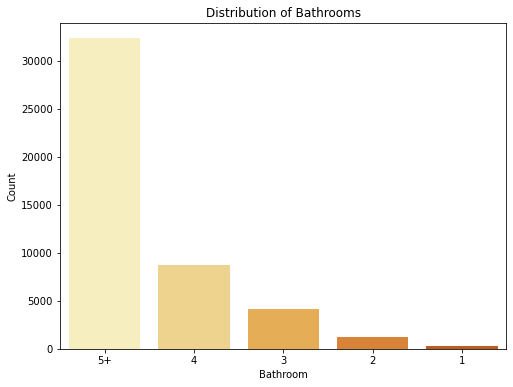

In [12]:
# Mapping dictionary for bathroom values into numerical values
bathroom_mapping = {'5+': 5, '4': 4, '3': 3, '2': 2, '1': 1}

# Replace the values in the 'bathrooms' column
df['bathrooms'] = df['bathrooms'].map(bathroom_mapping)

# Count the occurrences of each bathroom value
bathroom_counts = df['bathrooms'].value_counts()

# Define the custom labels for the x-axis
x_labels_b = ['5+', '4', '3', '2', '1']

# Set the color palette to shades of brown
cmap = sns.color_palette("YlOrBr")

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=x_labels_b, y=bathroom_counts.values, palette=cmap)
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.title('Distribution of Bathrooms')
plt.show()


In [13]:
unique_values_b = df['bathrooms'].unique()
unique_values_b # as we see we convert the data tpe into integer classes to use it in analye the data

array([5, 4, 3, 2, 1], dtype=int64)

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [14]:
# check the unique_values for front 
unique_values = df['front'].unique()
unique_values

array(['شرقية', 'غربية', 'جنوبية شرقية', 'شمالية', 'شمالية شرقية',
       'جنوبية', 'جنوبية غربية', 'شمالية غربية', 'ثلاث شوارع',
       'أربع شوارع'], dtype=object)

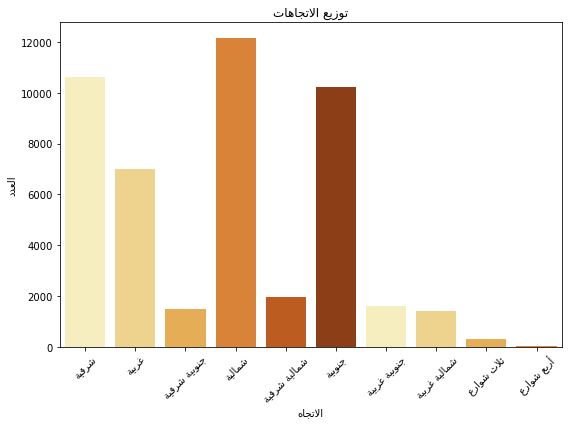

In [15]:
# Set the color palette to shades of brown
cmap = sns.color_palette("YlOrBr")

# Mapping dictionary for the classes
front_mapping = {
    'شرقية': 1,
    'غربية': 2,
    'جنوبية شرقية': 3,
    'شمالية': 4,
    'شمالية شرقية': 5,
    'جنوبية': 6,
    'جنوبية غربية': 7,
    'شمالية غربية': 8,
    'ثلاث شوارع': 9,
    'أربع شوارع': 10
}

# Replace the values in the column with the mapped classes
df['front'] = df['front'].map(front_mapping)

# Count the occurrences of each class
class_counts = df['front'].value_counts().sort_index()

# Reshape each unique value in the 'front' column
x_labels_f = [get_display(arabic_reshaper.reshape(label)) for label in front_mapping.keys()]

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=x_labels_f, y=class_counts, palette=cmap)
plt.xlabel(get_display(arabic_reshaper.reshape('الاتجاه')))
plt.ylabel(get_display(arabic_reshaper.reshape('العدد')))
plt.title(get_display(arabic_reshaper.reshape('توزيع الاتجاهات')))

# Rotate the x-axis labels at a 45-degree angle
plt.xticks(rotation=45)

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()

plt.show()


In [16]:
unique_values_f = df['front'].unique()
print(unique_values_f) # as we see we convert the data type into integer classes to use it in analye the data

[ 1  2  3  4  5  6  7  8  9 10]


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [17]:
unique_values_a = df['apartments'].unique()
print(unique_values_a)

['0' '2.0' '3.0' '1.0' '4.0' '7.0' '6.0' '1' '2' '3' '4' '30+' '5' '6' '8'
 '12' '11' '7' '9' '5.0' '15.0' '16.0' '13.0' '23' '10' '14' '20' '15' 2.0
 1.0 0.0 4.0 3.0 5.0 8.0 10.0 6.0 13.0 11.0 15.0 7.0 14.0 23.0 12.0]


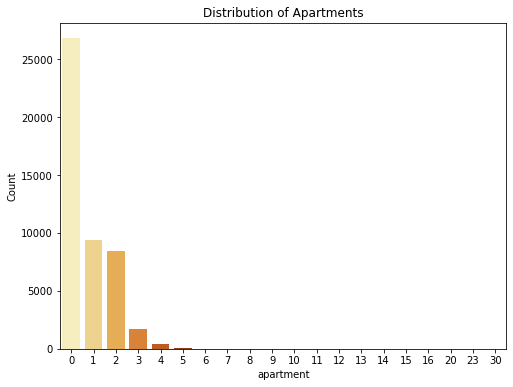

In [18]:
# Replace '30+' with a specific value or NaN
df['apartments'] = df['apartments'].replace('30+', 30)

# Convert 'apartments' column to float type
df['apartments'] = df['apartments'].astype(float)

# Convert 'apartments' column to int type
df['apartments'] = df['apartments'].astype(int)

# Count the occurrences of each apartment value
apartment_counts = df['apartments'].value_counts()

# Define the custom labels for the x-axis
x_labels_a = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
              '16', '20', '23', '30']

# Set the color palette to shades of brown
cmap = sns.color_palette("YlOrBr")

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=x_labels_a, y=apartment_counts.values, palette=cmap)
plt.xlabel('apartment')
plt.ylabel('Count')
plt.title('Distribution of Apartments')
plt.show()


In [19]:
unique_values_a = df['apartments'].unique()
print(unique_values_a) # as we see we convert the data type into integer classes to use it in analye the data

[ 0  2  3  1  4  7  6 30  5  8 12 11  9 15 16 13 23 10 14 20]


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Handel the missung values in the data set

## This code calculates the mean of 'price' and 'square price' for each neighborhood and then uses the transform() function to fill the missing values in the respective columns with the calculated mean values.

In [20]:
df['price'] = df['price'].fillna(df.groupby('neighbourhood')['price'].transform('mean'))
df['square price'] = df['square price'].fillna(df.groupby('neighbourhood')['square price'].transform('mean'))

## The code handle the comparison of the 'neighbourhood' column and filling the null values in the 'streetWidth' column based on the mode value of the corresponding 'neighbourhood'.

In [21]:
df['streetWidth'] = df.apply(lambda row: row['streetWidth'] if pd.notnull(row['streetWidth']) 
                             else df.loc[df['neighbourhood'] == row['neighbourhood'],
                                         'streetWidth'].mode().values[0] 
                             if len(df.loc[df['neighbourhood'] == row['neighbourhood'],'streetWidth'].mode()) > 0 
                             else None, axis=1)


In [22]:
df['streetWidth'].isnull().sum() # there is still 4 null

4

In [23]:
mean_width = df['streetWidth'].mean() # we handel the 4 nulls with the mean
df['streetWidth'] = df['streetWidth'].fillna(round(mean_width))

In [24]:
df['streetWidth'].isnull().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  int64  
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  int64  
 5   streetWidth    46826 non-null  float64
 6   stairs         46826 non-null  float64
 7   propertyAge    46826 non-null  float64
 8   driverRoom     46826 non-null  float64
 9   tent           46826 non-null  float64
 10  patio          46826 non-null  float64
 11  kitchen        46826 non-null  float64
 12  outdoorRoom    46826 non-null  float64
 13  garage         46826 non-null  float64
 14  duplex         46826 non-null  float64
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  int32  
 17  maidRoom       46826 non-null  float64
 18  elevat

In [26]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Select the columns for calculating cosine similarity
columns_for_similarity = ['front', 'rooms', 'bathrooms', 'streetWidth', 'stairs', 'propertyAge',
                          'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom', 'garage',
                          'duplex', 'space', 'apartments', 'maidRoom', 'elevator', 'furnihsed',
                          'pool', 'basement', 'price']

# Fill missing values in the 'lounges' column
df['lounges'] = df['lounges'].fillna('')  # Replace NaN with an empty string

# Convert 'lounges' column to numerical values using label encoding
label_encoder = LabelEncoder()
df['lounges_encoded'] = label_encoder.fit_transform(df['lounges'])

# Repeat the 'lounges_encoded' column values to match the shape of the other selected columns
lounges_encoded_reshaped = np.repeat(df['lounges_encoded'].values.reshape(-1, 1), len(columns_for_similarity), axis=1)

# Calculate the cosine similarity between 'lounges_encoded' and other selected columns
cosine_sim = cosine_similarity(lounges_encoded_reshaped, df[columns_for_similarity])

# Create a DataFrame with column names and cosine similarity values
similarity_df = pd.DataFrame({'Column': columns_for_similarity, 'Cosine Similarity': cosine_sim.flatten()})

# Sort the DataFrame by cosine similarity in descending order
similarity_df = similarity_df.sort_values(by='Cosine Similarity', ascending=False)


ValueError: arrays must all be same length

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Select the columns for calculating cosine similarity
columns_for_similarity = ['front', 'rooms', 'bathrooms', 'streetWidth', 'stairs', 'propertyAge',
                          'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom', 'garage',
                          'duplex', 'space', 'apartments', 'maidRoom', 'elevator', 'furnihsed',
                          'pool', 'basement']

# Fill missing values in the 'lounges' column
df['lounges'] = df['lounges'].fillna('')  # Replace NaN with an empty string

# Convert 'lounges' column to numerical values using label encoding
label_encoder = LabelEncoder()
df['lounges_encoded'] = label_encoder.fit_transform(df['lounges'])

# Repeat the 'lounges_encoded' column values to match the shape of the other selected columns
lounges_encoded_reshaped = np.repeat(df['lounges_encoded'].values.reshape(-1, 1), len(columns_for_similarity), axis=1)

# Calculate the cosine similarity between 'lounges_encoded' and other selected columns
cosine_sim = cosine_similarity(lounges_encoded_reshaped, df[columns_for_similarity])

# Create a DataFrame with column names and cosine similarity values
similarity_df = pd.DataFrame({'Column': columns_for_similarity, 'Cosine Similarity': cosine_sim.flatten()})

# Sort the DataFrame by cosine similarity in descending order
similarity_df = similarity_df.sort_values(by='Cosine Similarity', ascending=False)


ValueError: arrays must all be same length

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the 'lounges' column
df['lounges_encoded'] = label_encoder.fit_transform(df['lounges'])

# Split the data into two sets: one with non-null 'lounges' values and one with null 'lounges' values
train_data = df.dropna(subset=['lounges_encoded'])
test_data = df[df['lounges_encoded'].isnull()]

# Create the feature matrix (X) and target variable (y) for training
X_train = train_data[['price', 'space']]
y_train = train_data['lounges_encoded']

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to predict the missing 'lounges' values
X_test = test_data[['price', 'space']]
predicted_lounges = model.predict(X_test)

# Fill the missing values in the DataFrame with the predicted values
df.loc[df['lounges_encoded'].isnull(), 'lounges_encoded'] = predicted_lounges

# Decode the encoded 'lounges_encoded' column back to the original 'lounges' values
df['lounges'] = label_encoder.inverse_transform(df['lounges_encoded'])
s

## To handle the missing values in the 'lounges' column,.

In [ ]:
df.isnull().sum ()

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Set the color palette to shades of brown
cmap = sns.color_palette("YlOrBr")

# Plot the correlation matrix as a heatmap with the specified color palette
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap)
plt.title('Correlation Heatmap')
plt.show()

unique_values_l = df['lounges'].unique()
print(unique_values_l)

# Mapping dictionary for lounges values into numerical values
lounge_mapping = { '7+' : 7, '6': 6, '5': 5, '4': 4, '3' : 3, '2': 2, '1': 1,
                 '6.0': 6, '5.0': 5, '4.0': 4, '3.0' : 3, '2.0': 2, '1.0': 1,}

lounge_mapping

# Mapping dictionary for lounges values into numerical values
lounge_mapping = { '7+' : 7, '6': 6, '5': 5, '4': 4, '3' : 3, '2': 2, '1': 1,
                 '6.0': 6, '5.0': 5, '4.0': 4, '3.0' : 3, '2.0': 2, '1.0': 1, NaN: 10}


# Replace the values in the 'lounges' column
df['lounges'] = df['lounges'].map(lounge_mapping)

# Count the occurrences of each bathroom value
lounges_counts = df['lounges'].value_counts()
lounges_counts

# Mapping dictionary for lounges values into numerical values
lounge_mapping = {'7+': 7, '6': 6, '5': 5, '4': 4, '3': 3, '2': 2, '1': 1}


# Replace the values in the 'lounges' column
df['lounges'] = df['lounges'].map(lounge_mapping)

# Count the occurrences of each bathroom value
lounges_counts = df['lounges'].value_counts()

# Define the custom labels for the x-axis
x_labels_l = ['7+', '6', '5', '4', '3', '2', '1']

# Set the color palette to shades of brown
cmap = sns.color_palette("YlOrBr")

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=x_labels_l, y=lounges_counts.values, palette=cmap)
plt.xlabel('lounges')
plt.ylabel('Count')
plt.title('Distribution of lounges')
plt.show()



# Mapping dictionary for lounge values into numerical values
lounge_mapping = {'7+': int(7), '6': 6, '5': 5, '4': 4, '3': 3, '2': 2, '1': 1, "nan":11}

# Replace the values in the 'lounges' column
df['lounges'] = df['lounges'].map(lounge_mapping)

# Count the occurrences of each lounge value
lounge_counts = df['lounges'].value_counts()
lounge_counts

# Mapping dictionary for lounge values into numerical values
lounge_mapping = {'7+': 7, '6': 6, '5': 5, '4': 4, '3': 3, '2': 2, '1': 1, NaN:11}

# Replace the values in the 'lounges' column
df['lounges'] = df['lounges'].map(lounge_mapping)

# Count the occurrences of each lounge value
lounge_counts = df['lounges'].value_counts().sort_index()

# Define the custom labels for the x-axis
x_labels = ['7+', '6', '5', '4', '3', '2', '1']

# Set the color palette to shades of brown
cmap = sns.color_palette("YlOrBr")

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=x_labels, y=lounge_counts.reindex(x_labels).values, palette=cmap)
plt.xlabel('Lounges')
plt.ylabel('Count')
plt.title('Distribution of Lounges')
plt.show()
